<a href="https://colab.research.google.com/github/Marvel280904/Marvel---DataMining---Week-6---Praktikum/blob/main/Marvel_0706022210039_Week6_Adult_Income_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [63]:
# import libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder


## **Load Dataset**

In [64]:
# load data dari raw github
df = pd.read_csv('https://raw.githubusercontent.com/Marvel280904/Marvel---DataMining---Week-6---Praktikum/refs/heads/main/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## **Exploratory Data Analysis**

In [65]:
df.info() # info mengenai data dataframe (nama kolom, tipe data, dll)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [66]:
df.describe() # deskripsi mengenai dataframe (count, mean, standart deviasi, dll)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [67]:
# untuk menampilkan jumlah / frekuensi kemunculan setiap nilai unik di setiap kolom dalam dataframe
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship',
           'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

for col in columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for age:
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


Value counts for workclass:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Value counts for fnlwgt:
fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28523, dtype: int64


Value counts for education:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th           

In [68]:
# untuk mengganti semua nilai "?" dengan NaN
df.replace("?", np.nan, inplace=True)

In [69]:
# untuk memeriksa apakah masih ada nilai kosong / missing value yang tersisa di setiap kolom
df.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [70]:
# untuk mengganti missing value dengan modus (nilai yang paling sering muncul) karena modus mewakili nilai umum pada kolom tersebut.
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [71]:
# untuk memeriksa apakah masih ada nilai kosong / missing value yang tersisa di setiap kolom
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


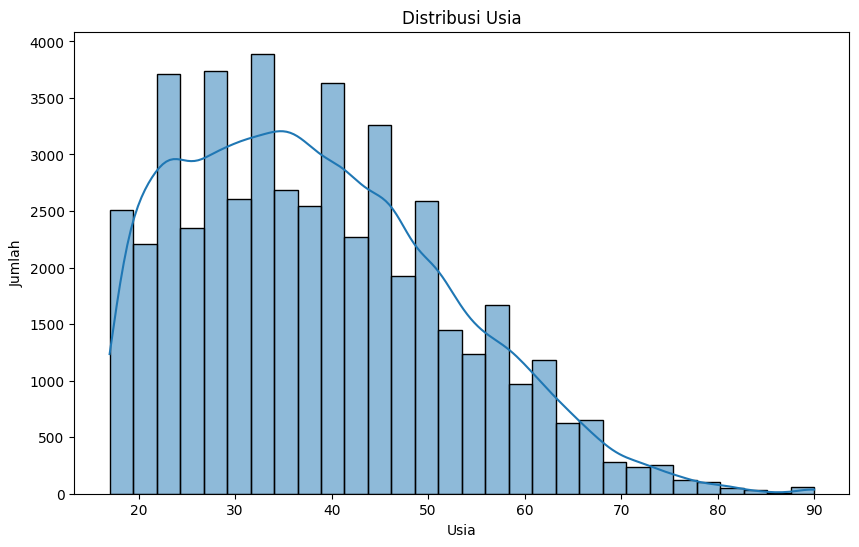

In [72]:
# visualisasi distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()


*   Sumbu X:  Rentang usia  orang (15-90 tahun).
*   Sumbu Y: Jumlah penduduk pada setiap kelompok umur.
*   Histogram: Kelompok umur 20 sampai 40 tahun merupakan yang terbesar.
*   Kurva kepadatan : Kurva  menunjukkan distribusi umur yang lebih halus. Setelah usia 50 tahun, jumlahnya menurun.
*   Distribusi: Data condong ke kanan (jumlah lansia lebih sedikit).

Visualisasi ini membantu dalam memahami pola usia dalam populasi sesuai DataFrame.







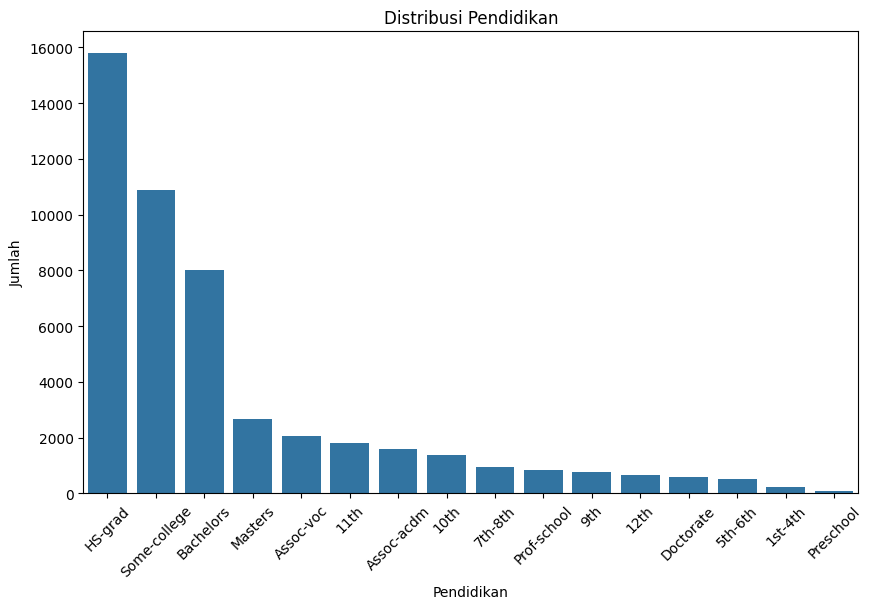

In [73]:
# visualisasi distribusi pendidikan
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, order=df['education'].value_counts().index)
plt.title('Distribusi Pendidikan')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

*   Sumbu X (horizontal): Menunjukkan kategori tingkat pendidikan dari pendidikan dasar hingga pendidikan tinggi.
*   Sumbu Y (vertikal): Menunjukkan jumlah orang di setiap kategori pendidikan.
*   Data sebaran:
  1.   HS-grad (lulusan SMA): Jumlah terbanyak, di atas 10.000.
  2.   Some-college (Penduduk yang bergelar sarjana atau sarjana) juga cukup banyak.
  3.   Sangat sedikit orang yang berpendidikan rendah seperti kelas 5 sampai kelas 6 (kelas 5 sampai kelas 6) atau Preschool.

Visualisasi ini menunjukkan bahwa mayoritas masyarakat dalam kumpulan data ini memiliki  pendidikan menengah hingga  tinggi.

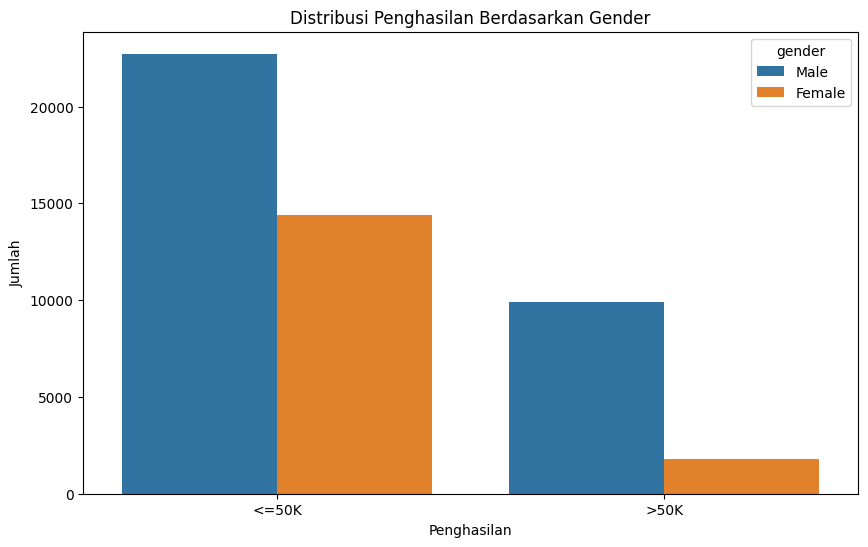

In [74]:
# visualisasi distribusi penghasilan berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
sns.countplot(x='income', hue='gender', data=df)
plt.title('Distribusi Penghasilan Berdasarkan Gender')
plt.xlabel('Penghasilan')
plt.ylabel('Jumlah')
plt.show()

*   Sumbu X (horizontal): Menunjukkan dua kategori pendapatan yaitu lebih besar atau lebih kecil dari 50.000.
*   Sumbu Y (vertikal): Menunjukkan jumlah orang di setiap kategori pendapatan.
*   Distribusi Data: Bahkan dengan pendapatan 50.000, terdapat lebih banyak laki-laki  dibandingkan perempuan, dan jumlahnya jauh lebih tinggi.

Visualisasi ini menunjukkan bahwa distribusi pendapatan laki-laki pada dataset cenderung  lebih tinggi dibandingkan perempuan, terutama pada kelompok pendapatan 50.000.



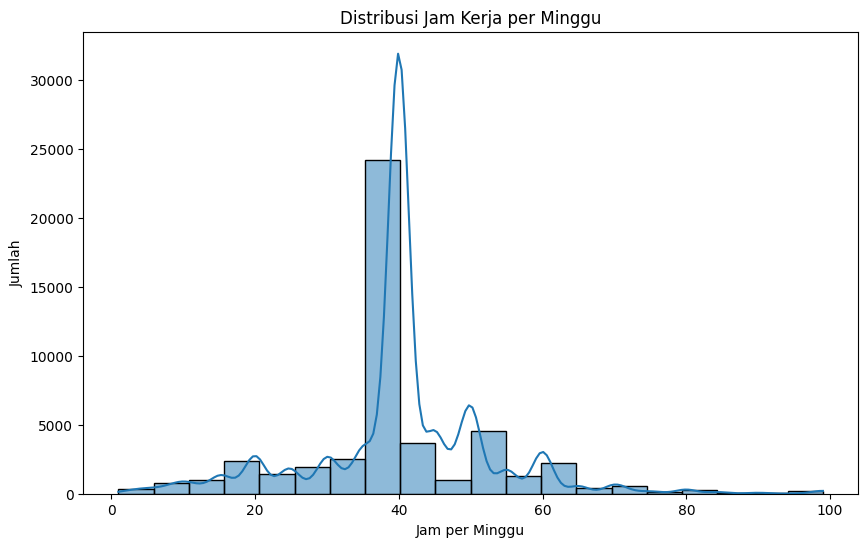

In [75]:
# visualisasi persebaran jam kerja per minggu
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], bins=20, kde=True)
plt.title('Distribusi Jam Kerja per Minggu')
plt.xlabel('Jam per Minggu')
plt.ylabel('Jumlah')
plt.show()

*   Sumbu X menunjukkan jam kerja per minggu, dan sumbu Y menunjukkan jumlah karyawan.
*    Seperti yang ditunjukkan oleh puncak angka ini pada grafik, mayoritas pekerja menghabiskan sekitar 40 jam seminggu.
*    Kurva kepadatan berwarna biru menunjukkan pola distribusi, dengan sebagian besar pekerja bekerja sekitar 40 jam dan beberapa bekerja lebih atau kurang.

Dari Diagram diatas, terlihat jam kerja paling banyak dalam 40 jam per minggu.



In [76]:
# untuk menampilkan nilai unik dari target variabel di dalam dataframe
print(f"Nilai unik untuk Income:")
print(df["income"].unique())

Nilai unik untuk Income:
['<=50K' '>50K']


In [77]:
# untuk mengubah kolom kategorikal (workclass, education, dll) menjadi numerik
label_encoder = LabelEncoder()

# untuk identifikasi dan memilih semua kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

# untuk mengonversi setiap kolom kategorikal ke numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# untuk menampilkan 10 data random
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


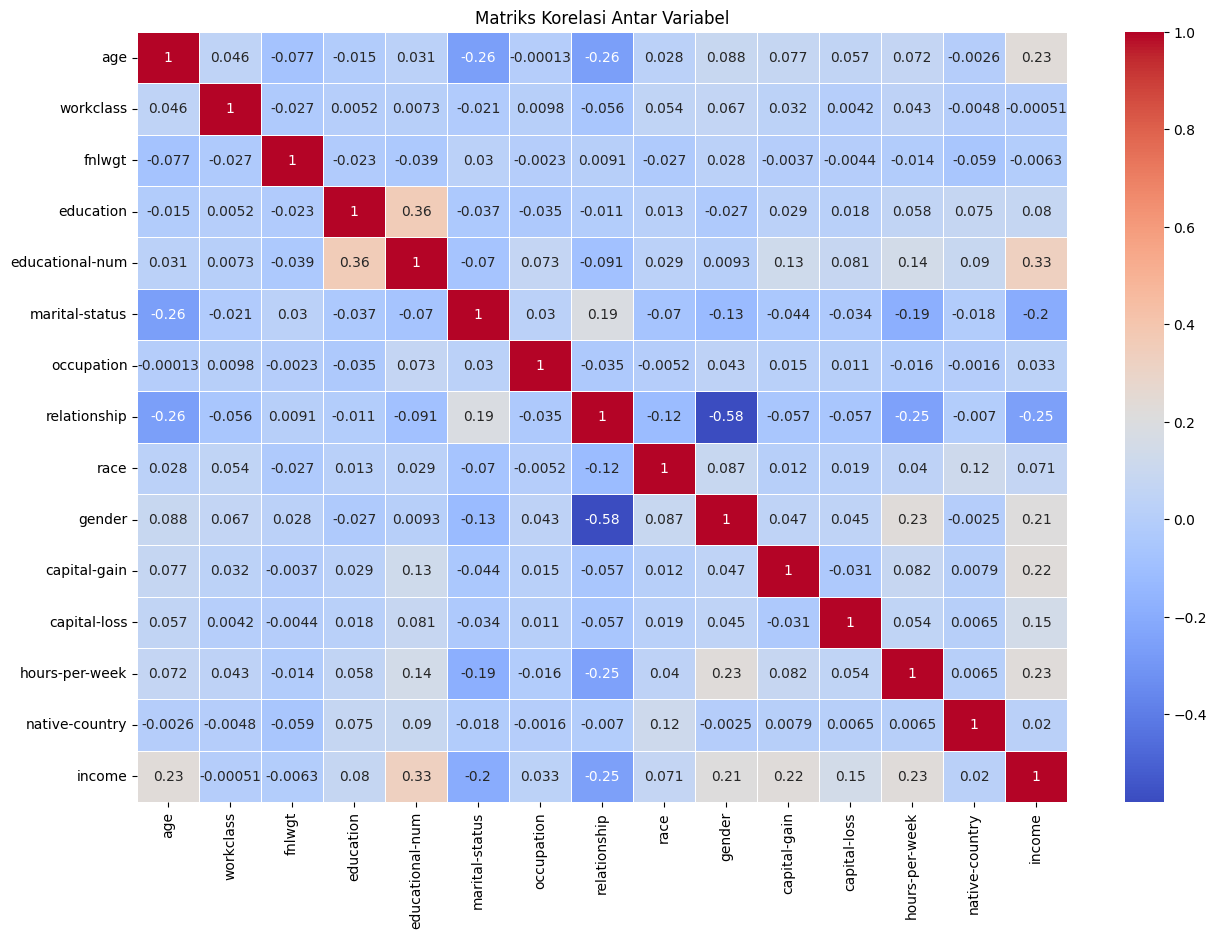

In [78]:
# Visualisasi Heatmap korelasi antar variabel
plt.figure(figsize=(15, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

Matriks ini membantu mengidentifikasi pasangan variabel yang memiliki hubungan kuat, baik positif maupun negatif, yang dapat berguna untuk analisis lebih lanjut.

*   Nilai 1 (merah tua) berarti korelasi positif sempurna, dan -1 (biru tua) berarti korelasi negatif sempurna.
*   Korelasi antara Education dan education.num adalah 0,36, menunjukkan hubungan yang cukup positif.
*   Hubungan dan gender memiliki korelasi negatif sekitar -0,58.
*   Pendapatan berkorelasi positif signifikan dengan education.num (0,34), age (0,23), dan hours.per.week (0,23).







## **Machine Learning**

In [79]:
# memisahkan variabel independen (X) dari target variabel dependen (y) dalam persiapan untuk model machine learning
X = df.drop(['income'], axis = 1)
y = df['income']

In [80]:
# split data untuk training dan test set (test size 20% and random state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# cek banyak kolom dan baris pada data X_train dan X_test
X_train.shape, X_test.shape

((39073, 14), (9769, 14))

## **Desicion Tree Entropy**

In [82]:
# membuat dan melatih model Decision Tree dengan menggunakan metode Entropy untuk model klasifikasinya lalu membatasinya hingga maksimal tiga tingkat (max_depth = 3)
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [83]:
# untuk membuat prediksi menggunakan model Decision Tree dengan metode Entropy yang sudah dilatih sebelumnya
y_pred_en = clf_en.predict(X_test)

In [84]:
# accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}' .format(clf_en.score(X_train, y_train)))

# Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}' .format(clf_en.score(X_test, y_test)))

# perbedaan antara hasil pelatihan dan  pengujian dapat menunjukkan apakah model mengalami overfitting
# jika hasil Training set score jauh lebih tinggi daripada hasil Test set score , maka artinya model mengalami overfitting


Model accuracy score with criterion entropy: 0.8449
Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\nentropy = 0.992\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\nentropy = 0.918\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'entropy = 0.882\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'entropy = 0.124\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\nentropy = 0.854\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'entropy = 0.914\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'entropy = 0.027\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\nentropy = 0.463\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\nentropy = 0.398\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'entropy = 0.287\nsamples = 20994\nvalue = [1994

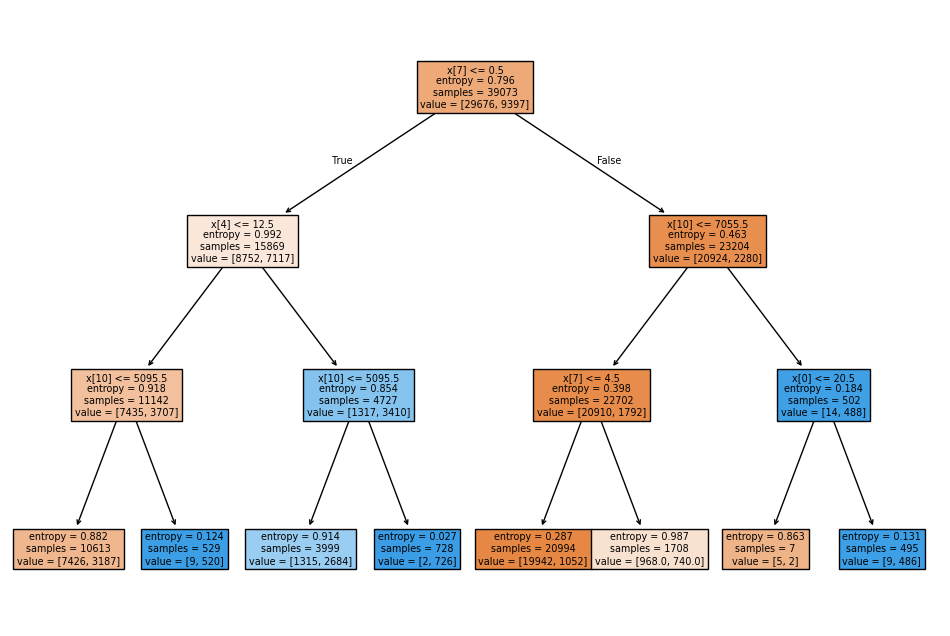

In [85]:
# untuk menampilkan visualisasi pohon keputusan yang dilatih menggunakan Decision Tree dengan metode Gini
plt.figure(figsize = (12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled = True)

## **Desicion Tree Gini**

In [86]:
# membuat dan melatih model Decision Tree dengan menggunakan metode Gini untuk model klasifikasinya lalu membatasinya hingga maksimal tiga tingkat (max_depth = 3)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [87]:
# untuk membuat prediksi menggunakan model Decision Tree dengan metode Gini yang sudah dilatih sebelumnya
y_pred_gini = clf_gini.predict(X_test)

In [88]:
# accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}' .format(clf_gini.score(X_train, y_train)))

# Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}' .format(clf_gini.score(X_test, y_test)))

# perbedaan antara hasil pelatihan dan  pengujian dapat menunjukkan apakah model mengalami overfitting
# jika hasil Training set score jauh lebih tinggi daripada hasil Test set score , maka artinya model mengalami overfitting

Model accuracy score with criterion gini index: 0.8449
Training set score: 0.8384
Test set score: 0.8449


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\ngini = 0.495\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\ngini = 0.444\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\ngini = 0.402\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'gini = 0.441\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\ngini = 0.177\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\ngini = 0.145\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, '

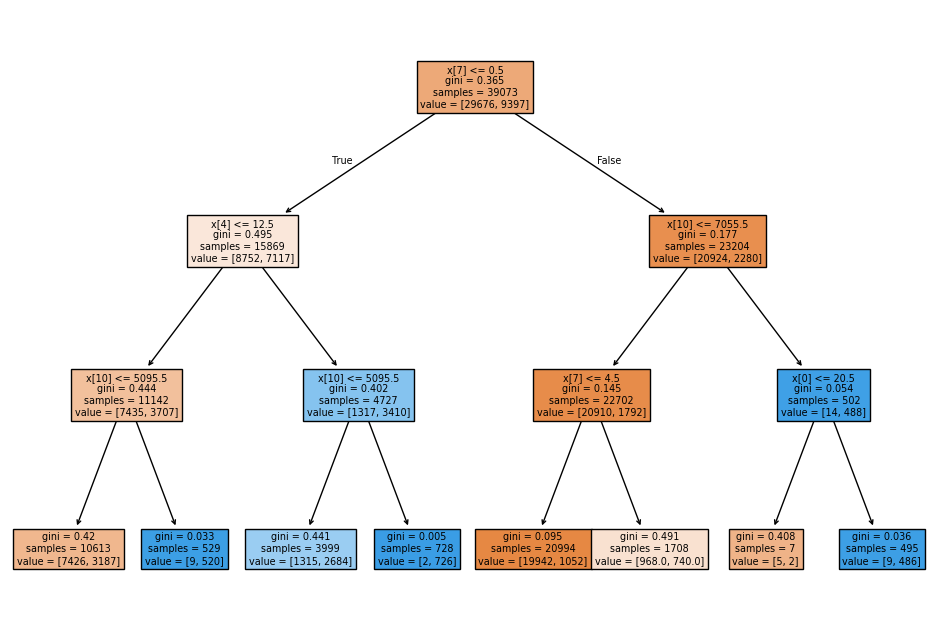

In [89]:
# untuk menampilkan visualisasi pohon keputusan yang dilatih menggunakan Decision Tree dengan metode Gini
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)

In [90]:
# untuk menghitung dan mencetak matriks kebingungan (confusion matrix) dari dua model klasifikasi yang berbeda
# yaitu model yang menggunakan Gini dan model yang menggunakan Entropy
gini = confusion_matrix(y_test, y_pred_gini)
entropi = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix gini index: \n', gini)
print('Confusion matrix entropy: \n', entropi)

Confusion matrix gini index: 
 [[7136  343]
 [1172 1118]]
Confusion matrix entropy: 
 [[7136  343]
 [1172 1118]]


In [91]:
# untuk mencetak laporan klasifikasi (classification report) dari dua model klasifikasi yang berbeda
# yaitu model yang menggunakan Gini dan model yang menggunakan Entropy
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_en))

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



**Kesimpulan**

**Entropy**

Model accuracy score with criterion entropy: 0.8449

Training set score: 0.8384

Test set score: 0.8449

Confusion matrix entropy:

 [[7136  343]

 [1172 1118]]

Classification Report Entropy

                    precision    recall  f1-score   support

               0       0.86      0.95      0.90      7479
               1       0.77      0.49      0.60      2290

        accuracy                           0.84      9769
       macro avg       0.81      0.72      0.75      9769
    weighted avg       0.84      0.84      0.83      9769


**Gini**

Model accuracy score with criterion gini index: 0.8449

Training set score: 0.8384

Test set score: 0.8449

Confusion matrix gini index:

 [[7136  343]

 [1172 1118]]

 Classification Report Gini Index

                    precision    recall  f1-score   support

               0       0.86      0.95      0.90      7479
               1       0.77      0.49      0.60      2290

        accuracy                           0.84      9769
       macro avg       0.81      0.72      0.75      9769
    weighted avg       0.84      0.84      0.83      9769

Model yang menggunakan kriteria entropi dan indeks Gini  memiliki performa yang hampir sama dengan akurasi 0,8449 pada set pengujian dan 0,8384 pada set pelatihan.

*   Matriks konfusi menunjukkan bahwa model dapat mengklasifikasikan kelas 0 dengan sangat baik (presisi 0,86, perolehan 0,95), namun berperforma buruk untuk kelas 1 (presisi 0,77, perolehan 0,49).
*    Laporan Klasifikasi: Rata-rata skor f1 untuk kelas 0 lebih tinggi (0,90) dibandingkan kelas 1 (0,60), yang menunjukkan adanya ketidakseimbangan dalam kinerja prediksi antar kelas.
*     Laporan Klasifikasi: Rata-rata skor f1 untuk kelas 0 lebih tinggi (0,90) dibandingkan kelas 1 (0,60), yang menunjukkan adanya ketidakseimbangan dalam kinerja prediksi antar kelas.
*     Akurasi makro: 0,75 menunjukkan bahwa kinerja tidak merata antar kelas, terutama di kelas minoritas.


Secara keseluruhan, model ini sangat akurat dan kedua model nya seimbang.



## **Naive Bayes**

In [92]:
# membuat dan melatih model Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [93]:
# untuk membuat prediksi menggunakan model Naive Bayes yang sudah dilatih sebelumnya
nb_y_pred = nb_classifier.predict(X_test)

In [94]:
# accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
print('Accuracy Score with GaussianNB: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))

# Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}' .format(nb_classifier.score(X_train, y_train)))

# Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}' .format(nb_classifier.score(X_test, y_test)))

# Perbedaan antara hasil pelatihan dan  pengujian dapat menunjukkan apakah model mengalami overfitting
# jika hasil Training set score jauh lebih tinggi daripada hasil Test set score , maka artinya model mengalami overfitting

Accuracy Score with GaussianNB: 0.7994
Training set score: 0.7936
Test set score: 0.7994


In [95]:
# untuk menghitung dan mencetak matriks kebingungan (confusion matrix) dari model klasifikasi Naive Bayes
Gauss = confusion_matrix(y_test, nb_y_pred)
print('Confusion matrix GaussianNB: \n', Gauss)

# untuk mencetak laporan klasifikasi (classification report) dari model klasifikasi Naive Bayes
print('\nClassification Report GaussianNB:')
print(classification_report(y_test, nb_y_pred))

Confusion matrix GaussianNB: 
 [[7099  380]
 [1580  710]]

Classification Report GaussianNB:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



## **Gradient Boosting Classifier**

In [96]:
# alasan saya menggunakan Gradient Boosting Classifier karena dapat membangun model secara bertahap dan mengoptimalkan kesalahan prediksi
# membuat dan melatih model Gradient Boosting Classifier
clf_gb = GradientBoostingClassifier(random_state=0)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [97]:
# untuk membuat prediksi menggunakan model Gradient Boosting Classifier yang sudah dilatih sebelumnya
y_pred_gb = clf_gb.predict(X_test)

In [98]:
# accuracy score untuk menunjukkan seberapa baik performa model pada data yang tidak digunakan untuk pelatihan
print('Model accuracy score with Gradient Boosting: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gb)))

# Training set score untuk menunjukkan seberapa baik model mempelajari data pelatihan
print('Training set score: {0:0.4f}'.format(clf_gb.score(X_train, y_train)))

# Test set score untuk menunjukkan seberapa baik model mempelajari data uji
print('Test set score: {0:0.4f}'.format(clf_gb.score(X_test, y_test)))

# perbedaan antara hasil pelatihan dan  pengujian dapat menunjukkan apakah model mengalami overfitting
# jika hasil Training set score jauh lebih tinggi daripada hasil Test set score , maka artinya model mengalami overfitting

Model accuracy score with Gradient Boosting: 0.8717
Training set score: 0.8658
Test set score: 0.8717


In [99]:
# untuk menghitung dan mencetak matriks kebingungan (confusion matrix) dari model Gradient Boosting Classifier
gb_cm = confusion_matrix(y_test, y_pred_gb)
print('Confusion matrix Gradient Boosting:\n', gb_cm)

# untuk mencetak laporan klasifikasi (classification report) dari model Gradient Boosting Classifier
print('\nClassification Report Gradient Boosting:')
print(classification_report(y_test, y_pred_gb))

Confusion matrix Gradient Boosting:
 [[7125  354]
 [ 899 1391]]

Classification Report Gradient Boosting:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7479
           1       0.80      0.61      0.69      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.87      0.87      0.87      9769



**Kesimpulan**

**Gini**

Model accuracy score with criterion gini index: 0.8449

Training set score: 0.8384

Test set score: 0.8449

Confusion matrix gini index:

 [[7136  343]

 [1172 1118]]

 Classification Report Gini Index

                    precision    recall  f1-score   support

               0       0.86      0.95      0.90      7479
               1       0.77      0.49      0.60      2290

        accuracy                           0.84      9769
       macro avg       0.81      0.72      0.75      9769
    weighted avg       0.84      0.84      0.83      9769


**Naive Bayes**

Accuracy Score with GaussianNB: 0.7994

Training set score: 0.7936

Test set score: 0.7994

Confusion matrix GaussianNB:

 [[7099  380]

 [1580  710]]

Classification Report GaussianNB

                    precision    recall  f1-score   support

               0       0.82      0.95      0.88      7479
               1       0.65      0.31      0.42      2290

        accuracy                           0.80      9769
       macro avg       0.73      0.63      0.65      9769
    weighted avg       0.78      0.80      0.77      9769


**Gradient Boosting Classifier**

Model accuracy score with Gradient Boosting: 0.8717

Training set score: 0.8658

Test set score: 0.8717

Confusion matrix Gradient Boosting:

 [[7125  354]

 [ 899 1391]]

Classification Report Gradient Boosting:

                    precision    recall  f1-score   support

               0       0.89      0.95      0.92      7479
               1       0.80      0.61      0.69      2290

        accuracy                           0.87      9769
       macro avg       0.84      0.78      0.80      9769
    weighted avg       0.87      0.87      0.87      9769



*   Gradient Boosting Classifier menunjukkan kinerja terbaik dengan akurasi 87,17% pada set pengujian dan skor f1 sebesar 0,92 untuk kelas mayoritas (0) dan 0,69 untuk kelas minoritas (1). Model ini mengenali kelas 1 lebih baik  dibandingkan model lainnya.
*   Presisi Decision Tree (Gini) sebesar 84,49%, namun recall untuk kelas 1 hanya sebesar 0,49 yang menunjukkan bahwa kinerja kelas minoritas belum optimal.
*   Naive Bayes memiliki presisi terendah (79,94%) dan performa paling buruk dalam mendeteksi kelas 1, dengan recall hanya 0,31, menjadikannya model yang kurang efektif untuk kumpulan data ini.

Jadi, Gradient Boosting Classifier direkomendasikan karena memberikan keseimbangan terbaik antara akurasi dan deteksi kelas minoritas.